In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')



In [107]:
background = pd.read_csv('background.csv', low_memory = False) #load the different data sets
train = pd.read_csv('train.csv')
prediction = pd.read_csv('prediction.csv')

In [108]:
background.head()

,challengeID,m1intmon,m1intyr,m1lenhr,m1lenmin,cm1twoc,cm1fint,cm1tdiff,cm1natsm,m1natwt,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-3,NaN,-3,40,NaN,0,NaN,NaN,NaN,...,-3.0,-3.000000,-3.000000,-3.000000,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
1,2,-3,NaN,0,40,NaN,1,NaN,NaN,NaN,...,-3.0,8.473318,-3.000000,-3.000000,-3.0,-3.000000,9.845074,-3,-3.000000,9.723551
2,3,-3,NaN,0,35,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,9.097495,10.071504,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
3,4,-3,NaN,0,30,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,9.512706,10.286578,-3.0,10.677285,-3.000000,-3,8.522331,10.608137
4,5,-3,NaN,0,25,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,11.076016,9.615958,-3.0,9.731979,-3.000000,-3,10.115313,9.646466


In [109]:
train.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.5,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
prediction.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
1,2,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
2,3,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
3,4,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
4,5,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771


In [111]:
train.describe()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
count,2121.000000,1165.000000,1418.000000,1459.000000,1459.000000,1277.000000,1461.000000
mean,2085.421971,2.866738,3.427539,0.103745,0.059630,0.209084,0.234771
std,1209.429502,0.665322,0.485130,0.155665,0.236881,0.406814,0.424001
min,1.000000,1.000000,1.250000,0.000000,0.000000,0.000000,0.000000
25%,1032.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2110.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000
75%,3109.000000,3.250000,3.750000,0.181818,0.000000,0.000000,0.000000
max,4241.000000,4.000000,4.000000,0.818182,1.000000,1.000000,1.000000


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 7 columns):
challengeID         2121 non-null int64
gpa                 1165 non-null float64
grit                1418 non-null float64
materialHardship    1459 non-null float64
eviction            1459 non-null float64
layoff              1277 non-null float64
jobTraining         1461 non-null float64
dtypes: float64(6), int64(1)
memory usage: 116.1 KB


In [113]:
background.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Columns: 12943 entries, challengeID to k5f1
dtypes: float64(3307), int64(9489), object(147)
memory usage: 418.9+ MB


In [114]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 7 columns):
challengeID         4242 non-null int64
gpa                 4242 non-null float64
grit                4242 non-null float64
materialHardship    4242 non-null float64
eviction            4242 non-null float64
layoff              4242 non-null float64
jobTraining         4242 non-null float64
dtypes: float64(6), int64(1)
memory usage: 232.1 KB


In [115]:
columns = ['challengeID','cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf','cm1age']

In [116]:
short_df = background[columns] 
short_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 8 columns):
challengeID    4242 non-null int64
cm1ethrace     4242 non-null int64
cf1ethrace     4242 non-null int64
cm1edu         4242 non-null int64
cf1edu         4242 non-null int64
cm5povco       4242 non-null float64
cm1relf        4242 non-null int64
cm1age         4242 non-null int64
dtypes: float64(1), int64(7)
memory usage: 265.2 KB


These columns were chosen both for lack of missing data and indications of being good predictors as shown in the EDA

These variables are:

'cm1ethrace': Race of the mother

'cf1ethrace': Race of the father

'cm1edu': Education level of the mother

'cf1edu':  Education level of the father

'cm5povco': A measure of poverty level of the mother

'cm1relf': A measure of mother's relationship with father (married, cohabitating, unknown, etc)

'cm1age': Mother's age when child was born


In [117]:
joined_df =  train.join(short_df.set_index('challengeID'), on='challengeID') #only want the background information for those in the training set
joined_df.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining,cm1ethrace,cf1ethrace,cm1edu,cf1edu,cm5povco,cm1relf,cm1age
0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,3,-9.000000,1,27
1,3,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,3,-9.000000,1,23
2,6,NaN,3.50,0.090909,0.0,0.0,0.0,3,3,2,2,4.755653,2,18
3,7,2.5,3.25,0.000000,0.0,0.0,0.0,2,3,3,1,3.481916,2,23
4,8,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,-9.000000,3,21


#### Selection of Variables and Splitting test sets

In [118]:
import sklearn
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [119]:
# This function selects the variable of choice and prepares the dataframes and creates train/test sets
def pred_prep(variable, df):
    # variable is the predicted variable of interest - should be column found in df and be a string
    # df is the dataframe of features and predictions (this is designed to have them all in the same dataframe)
    y = df[variable] # variable we are interested in

    y.dropna(how='any', inplace=True) # drop those with no reported outcome

    # get the rows for which we can predict
    y_indices = y.index.values.tolist()

    columns = ['cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf','cm1age']

    X = df[columns]

    small_X = X.loc[y_indices]
    
    X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    small_X, y, test_size=0.33, random_state = 5)
    
    return X_train, X_test, y_train, y_test, small_X, y


## GPA Test

In [120]:
X_train, X_test, y_train, y_test, small_X, y = pred_prep('gpa', joined_df)

In [121]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, predicted))
print("R^2: ", r2_score(y_test, predicted))

RMSE:  0.465997564935
R^2:  -0.103762461723


In [122]:
rf.score(X_test, y_test)

-0.10376246172345827

In [127]:
rf.n_features_

7

In [128]:
# Setup the hyperparameter grid
n_est = np.linspace(45,75,31).astype(int)
param_grid = {'n_estimators': n_est}
# Instantiate a logistic regression classifier: logreg
RF = RandomForestRegressor()

# Instantiate the GridSearchCV object: logreg_cv
RF_cv = GridSearchCV(RF, param_grid, cv=5)

# Fit it to the data
RF_cv.fit(small_X,y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(RF_cv.best_params_)) 
print("Best score is {}".format(RF_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 62}
Best score is 0.018422094729646777


In [125]:
rf = RandomForestRegressor(n_estimators = 49)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
print("RMSE: ", mean_squared_error(y_test, predicted))
print("R^2: ", r2_score(y_test, predicted))
rf.feature_importances_

RMSE:  0.426930491681
R^2:  -0.0112281392452


array([ 0.05180895,  0.05874316,  0.07996014,  0.10730116,  0.39375434,
        0.08092396,  0.2275083 ])

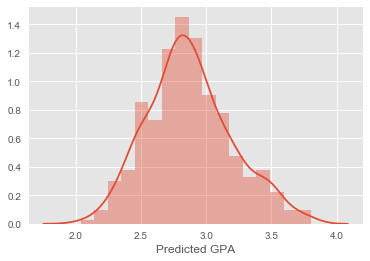

In [126]:
sns.distplot(predicted,axlabel="Predicted GPA")

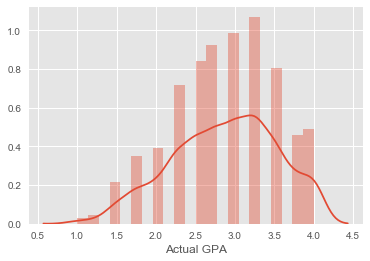

In [129]:
sns.distplot(y,axlabel="Actual GPA")

Looking at these distributions, it is clear that the shape of the prediction is much more 'normal' than the true distribution. Futher, the categorical nature of the GPA shines through in the true graph. With that in mind, I will now try using a random forest classifier rather than a regressor.

In [130]:
y_train.value_counts()

3.25    109
3.00    102
2.75    100
3.50     88
2.25     87
2.50     79
4.00     53
2.00     47
3.75     47
1.75     37
1.50     22
1.25      5
1.00      4
Name: gpa, dtype: int64

In [131]:
y_trainer = y_train # This will turn the data into categorical with each gpa measure being represented by an integer
for i in range(len(y_train)):
    if y_train.iloc[i] == 1.00:
        y_trainer.iloc[i] = 0
    elif y_train.iloc[i] == 1.25:
        y_trainer.iloc[i] = 1
    elif y_train.iloc[i] == 1.50:
        y_trainer.iloc[i] = 2
    elif y_train.iloc[i] == 1.75:
        y_trainer.iloc[i] = 3
    elif y_train.iloc[i] == 2.00:
        y_trainer.iloc[i] = 4
    elif y_train.iloc[i] == 2.25:
        y_trainer.iloc[i] = 5
    elif y_train.iloc[i] == 2.50:
        y_trainer.iloc[i] = 6
    elif y_train.iloc[i] == 2.75:
        y_trainer.iloc[i] = 7
    elif y_train.iloc[i] == 3.00:
        y_trainer.iloc[i] = 8
    elif y_train.iloc[i] == 3.25:
        y_trainer.iloc[i] = 9
    elif y_train.iloc[i] == 3.5:
        y_trainer.iloc[i] = 10
    elif y_train.iloc[i] == 3.75:
        y_trainer.iloc[i] = 11
    elif y_train.iloc[i] == 4.00:
        y_trainer.iloc[i] = 12

In [132]:
y_tester = y_test # again for the other part of the data set
for i in range(len(y_test)):
    if y_test.iloc[i] == 1.00:
        y_tester.iloc[i] = 0
    elif y_test.iloc[i] == 1.25:
        y_tester.iloc[i] = 1
    elif y_test.iloc[i] == 1.50:
        y_tester.iloc[i] = 2
    elif y_test.iloc[i] == 1.75:
        y_tester.iloc[i] = 3
    elif y_test.iloc[i] == 2.00:
        y_tester.iloc[i] = 4
    elif y_test.iloc[i] == 2.25:
        y_tester.iloc[i] = 5
    elif y_test.iloc[i] == 2.50:
        y_tester.iloc[i] = 6
    elif y_test.iloc[i] == 2.75:
        y_tester.iloc[i] = 7
    elif y_test.iloc[i] == 3.00:
        y_tester.iloc[i] = 8
    elif y_test.iloc[i] == 3.25:
        y_tester.iloc[i] = 9
    elif y_test.iloc[i] == 3.5:
        y_tester.iloc[i] = 10
    elif y_test.iloc[i] == 3.75:
        y_tester.iloc[i] = 11
    elif y_test.iloc[i] == 4.00:
        y_tester.iloc[i] = 12


In [133]:
y_trainer.head() # looks like it worked

818      8.0
1367     9.0
1059    10.0
196     11.0
1254     5.0
Name: gpa, dtype: float64

In [134]:
RF = RandomForestClassifier() #train the new classifier on the modified data
RF.fit(X_train, y_trainer) #note that it is on 'trainer' and 'tester'
RF_probs = RF.predict_proba(X_test)
logloss = log_loss(y_tester, RF_probs)
print(logloss)
RF.score(X_test, y_tester)

17.824099874


0.12987012987012986

In [135]:
print(['cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf','cm1age'])
print(RF.feature_importances_)

['cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf', 'cm1age']
[ 0.06670362  0.0676224   0.07427068  0.08486935  0.34783001  0.1149355
  0.24376844]


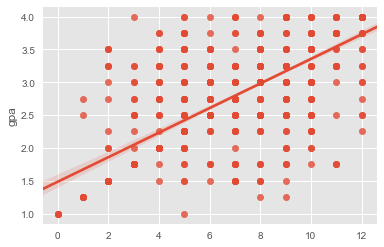

In [136]:
sns.regplot(y=y, x=RF.predict(small_X), fit_reg = True)

In [137]:
x = RF.predict(small_X) #this is getting the count of how many dots are truly on the diagonal of the graph
x = x*.25 + 1
count = 0
l = len(x)
for i in range(len(x)):
    if x[i] == y.iloc[i]:
        count = count + 1
count

812

In [68]:
len(x) 

1165

Interestingly, even though the R^2 is quite low, the model did predict 70% of the GPA's correctly. That's actually much better than it seemed initially.

In [138]:
x = rf.predict(small_X)
count = 0
l = len(x)
for i in range(len(x)):
    if x[i] == y.iloc[i]:
        count = count + 1
count

6

In [139]:
x = rf.predict(small_X)
count = 0
l = len(x)
for i in range(len(x)):
    if y.iloc[i]-.125 <= x[i] <= y.iloc[i]+.125: #giving it some wiggle room since the model could give more decimal places
        count = count + 1
count

352

Comparatively, the regressor version only predicted 1% correctly - although the nature of the regression makes it harder to match exactly. When I give it a .25 confidence interval, the percentage increases to about 30%. Still, it seems thinking of GPA as a categorical feature is actually more accurate.

## Job Training

In [94]:
X_train, X_test, y_train, y_test, small_X, y = pred_prep('jobTraining', joined_df) # moving on to the next prediction

In [95]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_probs = RF.predict_proba(X_test)
logloss = log_loss(y_test, RF_probs)
print(logloss)
RF.score(X_test, y_test)

1.67233046725


0.72463768115942029

In [97]:
# Setup the hyperparameter grid
n_est = np.linspace(1,25,25).astype(int)
param_grid = {'n_estimators': n_est}
# Instantiate a logistic regression classifier: logreg
RF = RandomForestClassifier()

# Instantiate the GridSearchCV object: logreg_cv
RF_cv = GridSearchCV(RF, param_grid, cv=5)

# Fit it to the data
RF_cv.fit(small_X,y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(RF_cv.best_params_)) 
print("Best score is {}".format(RF_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 2}
Best score is 0.7378507871321013


In [100]:
clf = RandomForestClassifier(n_estimators = 2)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
print(columns)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))


['challengeID', 'cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf', 'cm1age']
[ 0.04151603  0.07019121  0.07510962  0.09393997  0.35952766  0.10225622
  0.2574593 ]
0.718426501035


We were able to get 72% accuracy here with the random forest classifier. It appears that the poverty measure and age of the mother were the most significant predictors. 

In [102]:
y.value_counts()

0.0    1118
1.0     343
Name: jobTraining, dtype: int64

In [104]:
x = clf.predict(X_test)
print(confusion_matrix(y_test, x))
print(classification_report(y_test, x))

[[333  39]
 [ 97  14]]
             precision    recall  f1-score   support

        0.0       0.77      0.90      0.83       372
        1.0       0.26      0.13      0.17       111

avg / total       0.66      0.72      0.68       483



Of course, as often seems to be the case when the number of negatives vastly outnumbers the number of positives, the model tends to learn toward predicting negatives, but there were still 72% of the predictions done correctly.

## Conclusion
These features do seem to give fairly decent prediction, and I'm sure with some optimization we could get the percentages up a bit, but this is likely near the limit of what these features can do. With that in mind, the next steps would be to try and include more features. These will likely need to be imputed as many of the other features contain a lot of missing data. But, with more features, there is a chance for the models to find better combinations of features to improve the predictive power.